### Homework 2 
#### Submitted by: Apurv Mittal

In [33]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import classification_report
import csv


## Homework Instructions
#### Adapt this code below to run your analysis
#### 1. Write a function to take a list or dictionary of clfs and hypers(i.e. use logistic regression), each with 3 different sets of hyper parameters for each
#### 2. Expand to include larger number of classifiers and hyperparameter settings
#### 3. Find some simple data
#### 4. Generate matplotlib plots that will assist in identifying the optimal clf and parampters settings
#### 5. Please set up your code to be run and save the results to the directory that its executed from
#### 6. Investigate grid search function

In [2]:
# Adapt the code for defining a callable function to print the accuracy for a given model for various hyperparameter

def run(a_clf, data, clf_hyper={}):
  M, L, n_folds = data # unpack data container
  kf = KFold(n_splits=n_folds) # Establish the cross validation
  ret = {} # classic explication of results

  for ids, (train_index, test_index) in enumerate(kf.split(M, L)):
    clf = a_clf(**clf_hyper) # unpack parameters into clf is they exist
    clf.fit(M[train_index], L[train_index])
    pred = clf.predict(M[test_index])
    ret[ids]= {'clf': clf,
               'train_index': train_index,
               'test_index': test_index,
               'accuracy': accuracy_score(L[test_index], pred)}
  return ret

In [3]:
# First get the data from the sklearn available datasets. Start with iris dataset.
iris = datasets.load_iris()

In [4]:
# Define Target (L) and Independent (M) variables
M = iris.data
L = iris.target
n_folds = 5

In [5]:
# Use standard scaler to normalize the value of independent variable before running the models
scaler = StandardScaler()
M = scaler.fit_transform(M)

In [6]:
data = (M, L, n_folds)
print(data)

(array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
     

In [7]:
# list of models for classification
models = [LogisticRegression, RandomForestClassifier]
models

[sklearn.linear_model._logistic.LogisticRegression,
 sklearn.ensemble._forest.RandomForestClassifier]

In [8]:
# Define the hyper-parameters for each classifier

clf_hp = {'LogisticRegression': {"penalty": ['l2'],"C" :[0.005,0.01, 0.1, 1, 50],"max_iter": [500,1000,5000]},
        'RandomForestClassifier': {"n_estimators": [100, 200, 300],"max_depth": [5, 10, 15, 20],"min_samples_leaf": [2, 3, 4, 5]}}

In [9]:
print(clf_hp)

{'LogisticRegression': {'penalty': ['l2'], 'C': [0.005, 0.01, 0.1, 1, 50], 'max_iter': [500, 1000, 5000]}, 'RandomForestClassifier': {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15, 20], 'min_samples_leaf': [2, 3, 4, 5]}}


In [34]:
# build all different combinations of hypertuning parameters

# Reference:  https://stackoverflow.com/questions/38721847/how-to-generate-all-combination-from-values-in-dict-of-lists-in-python

hyper_parameters = dict()
for model in models:
    name = str(model)
    for key, v in clf_hp.items():
        if key in name:
            hyper_parameters[model] = [dict(zip(v, p)) for p in itertools.product(*v.values())]
            print(hyper_parameters)

{<class 'sklearn.linear_model._logistic.LogisticRegression'>: [{'penalty': 'l2', 'C': 0.005, 'max_iter': 500}, {'penalty': 'l2', 'C': 0.005, 'max_iter': 1000}, {'penalty': 'l2', 'C': 0.005, 'max_iter': 5000}, {'penalty': 'l2', 'C': 0.01, 'max_iter': 500}, {'penalty': 'l2', 'C': 0.01, 'max_iter': 1000}, {'penalty': 'l2', 'C': 0.01, 'max_iter': 5000}, {'penalty': 'l2', 'C': 0.1, 'max_iter': 500}, {'penalty': 'l2', 'C': 0.1, 'max_iter': 1000}, {'penalty': 'l2', 'C': 0.1, 'max_iter': 5000}, {'penalty': 'l2', 'C': 1, 'max_iter': 500}, {'penalty': 'l2', 'C': 1, 'max_iter': 1000}, {'penalty': 'l2', 'C': 1, 'max_iter': 5000}, {'penalty': 'l2', 'C': 50, 'max_iter': 500}, {'penalty': 'l2', 'C': 50, 'max_iter': 1000}, {'penalty': 'l2', 'C': 50, 'max_iter': 5000}]}
{<class 'sklearn.linear_model._logistic.LogisticRegression'>: [{'penalty': 'l2', 'C': 0.005, 'max_iter': 500}, {'penalty': 'l2', 'C': 0.005, 'max_iter': 1000}, {'penalty': 'l2', 'C': 0.005, 'max_iter': 5000}, {'penalty': 'l2', 'C': 0.01

In [11]:
# run each model combination

results_det={}
clf_results = {}
for model in models:
    for params in hyper_parameters[model]:
        clf_hyper = params
        clf_results = run(model, data, clf_hyper)
        print(clf_results)
        
        for i in clf_results:
            acc_model = clf_results[i]['accuracy']
            model_det = str(clf_results[i]['clf'])
            model_det = ' '.join(x.strip() for x in model_det.split())
            results_det[model_det] = [acc_model]

### Reference: https://stackoverflow.com/questions/31181830/adding-item-to-dictionary-within-loop

{0: {'clf': LogisticRegression(C=0.005, max_iter=500), 'train_index': array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149]), 'test_index': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), 'accuracy': 0.0}, 1: {'clf': LogisticRegression(C=0.005, max_iter=500), 'train_index': array([  0,   1,   2,

In [12]:
print(results_det)

{'LogisticRegression(C=0.005, max_iter=500)': [0.0], 'LogisticRegression(C=0.005, max_iter=1000)': [0.0], 'LogisticRegression(C=0.005, max_iter=5000)': [0.0], 'LogisticRegression(C=0.01, max_iter=500)': [0.0], 'LogisticRegression(C=0.01, max_iter=1000)': [0.0], 'LogisticRegression(C=0.01, max_iter=5000)': [0.0], 'LogisticRegression(C=0.1, max_iter=500)': [0.5333333333333333], 'LogisticRegression(C=0.1, max_iter=1000)': [0.5333333333333333], 'LogisticRegression(C=0.1, max_iter=5000)': [0.5333333333333333], 'LogisticRegression(C=1, max_iter=500)': [0.7333333333333333], 'LogisticRegression(C=1, max_iter=1000)': [0.7333333333333333], 'LogisticRegression(C=1, max_iter=5000)': [0.7333333333333333], 'LogisticRegression(C=50, max_iter=500)': [0.8333333333333334], 'LogisticRegression(C=50, max_iter=1000)': [0.8333333333333334], 'LogisticRegression(C=50, max_iter=5000)': [0.8333333333333334], 'RandomForestClassifier(max_depth=5, min_samples_leaf=2)': [0.8], 'RandomForestClassifier(max_depth=5, m

#### Matplot to detemine the best model

Below plot shows the accuracy % against each model for various hyper parameters. Random Forest shows higher accuracy compared to that of the Logistic Regression.



In [13]:
results_det.values()

dict_values([[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.5333333333333333], [0.5333333333333333], [0.5333333333333333], [0.7333333333333333], [0.7333333333333333], [0.7333333333333333], [0.8333333333333334], [0.8333333333333334], [0.8333333333333334], [0.8], [0.8], [0.8], [0.9], [0.8333333333333334], [0.8666666666666667], [0.7666666666666667], [0.7666666666666667], [0.8333333333333334], [0.7666666666666667], [0.8], [0.7333333333333333], [0.8], [0.8333333333333334], [0.7666666666666667], [0.7666666666666667], [0.8333333333333334], [0.8], [0.8], [0.8333333333333334], [0.7666666666666667], [0.8], [0.8666666666666667], [0.7666666666666667], [0.8333333333333334], [0.8], [0.8], [0.8], [0.8666666666666667], [0.8], [0.8], [0.8], [0.8333333333333334], [0.7666666666666667], [0.8], [0.8], [0.8], [0.8], [0.8], [0.7666666666666667], [0.8666666666666667], [0.8333333333333334], [0.8], [0.8], [0.8], [0.8], [0.8], [0.8]])

<function matplotlib.pyplot.show(close=None, block=None)>

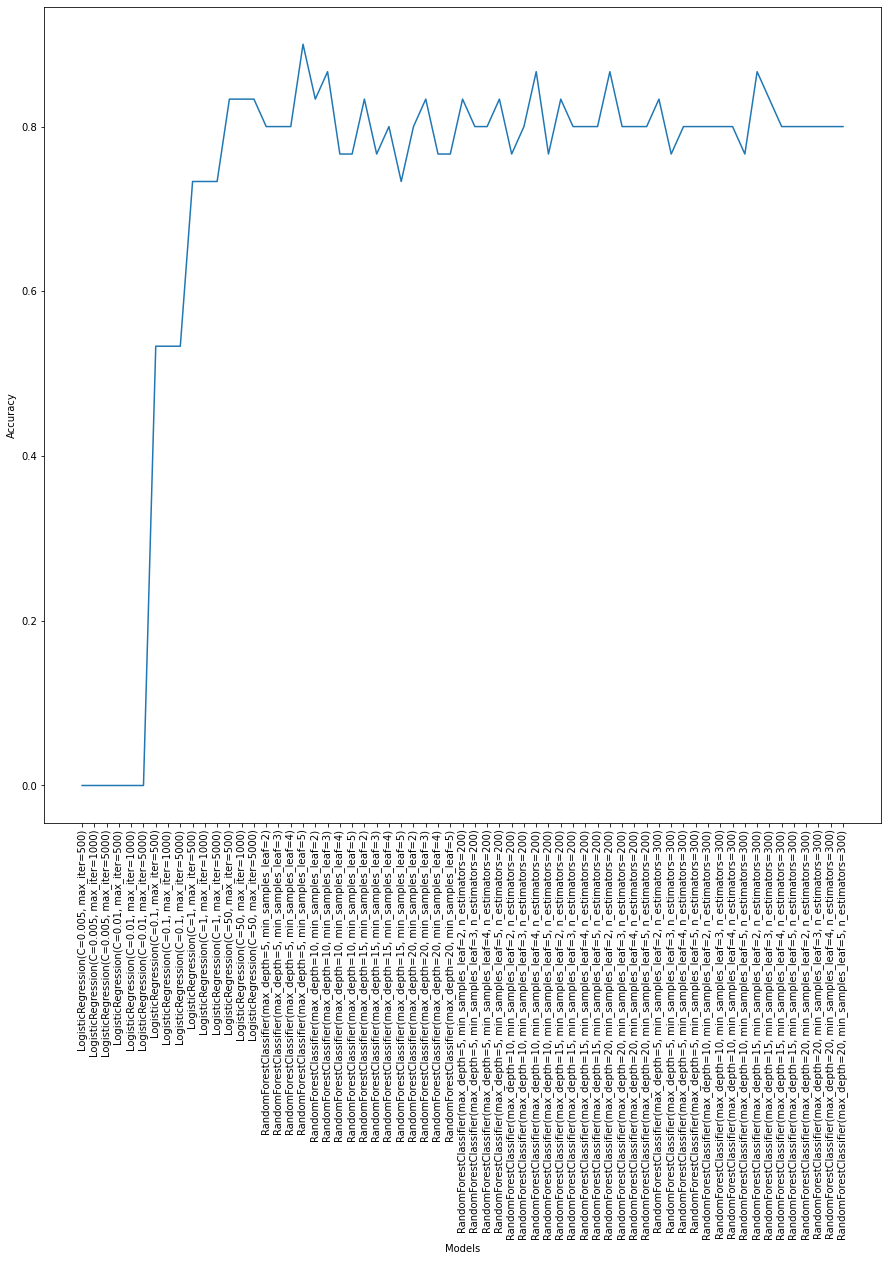

In [14]:
plt.figure(figsize=(15,15))
x = results_det.keys()
y = results_det.values()
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.plot(x, y)
plt.xticks(rotation=90)
plt.show

#### Write to a CSV

In [29]:
#Create a CSV file and write the results
# Reference: https://www.tutorialspoint.com/How-to-save-a-Python-Dictionary-to-CSV-file

with open('results.csv','w') as f:
    for key in results_det.keys():
        f.write("%s,%s\n"%(key,results_det[key]))



#### Grid Search

In [16]:
# Grid Search using gridsearch function
kf = KFold(n_splits=5)

#logistic regression
# hyperparameters    
penalty_LR = ['l1', 'l2']
C_LR = [0.005,0.01, 0.1, 1, 50]
max_iter_LR =  [500,1000,5000]

# define grid search
parameters = dict(penalty=penalty_LR, C=C_LR, max_iter=max_iter_LR) 

LR = LogisticRegression()

grid_search = GridSearchCV(estimator=LR, param_grid=parameters, n_jobs=5, cv=kf, scoring='accuracy')



In [17]:
grid_result = grid_search.fit(M,L)

print("Highest accuracy of %s for parameters %s" % (grid_result.best_score_, grid_result.best_params_))

# Reference: https://realpython.com/python-f-strings/

Highest accuracy of 0.9333333333333333 for parameters {'C': 50, 'max_iter': 500, 'penalty': 'l2'}


In [18]:
grid_result.cv_results_

{'mean_fit_time': array([0.00027947, 0.00832915, 0.00029998, 0.00768895, 0.00026407,
        0.00624008, 0.00023127, 0.00576639, 0.00014873, 0.00479736,
        0.00016642, 0.00625143, 0.00019789, 0.00652838, 0.00016251,
        0.00655818, 0.00019732, 0.00676951, 0.00016932, 0.00888958,
        0.00022197, 0.01017237, 0.00022879, 0.00924878, 0.00013032,
        0.01418505, 0.00019298, 0.01278958, 0.00019145, 0.01499548]),
 'std_fit_time': array([2.24450041e-05, 1.56288027e-03, 3.76328151e-05, 7.60585886e-04,
        3.97642166e-05, 5.69505972e-04, 4.94567722e-05, 8.92712453e-04,
        1.45559571e-05, 9.23070820e-04, 4.09810954e-05, 2.48006604e-04,
        5.91076155e-05, 6.62879459e-04, 3.05412618e-05, 5.75047286e-04,
        2.97141105e-05, 8.83165181e-04, 5.84979115e-05, 7.75157220e-04,
        2.32503960e-05, 1.09369526e-03, 2.11317960e-05, 1.88313618e-03,
        1.46028995e-05, 4.55391899e-03, 3.21214867e-05, 4.76377025e-03,
        4.29690872e-05, 2.51543476e-03]),
 'mean_scor

In [19]:
best_Estimator =grid_result.best_estimator_
best_Estimator

LogisticRegression(C=50, max_iter=500)

#### Classification Matrix and ROC Plots

In [20]:
predicted_L = cross_val_predict(best_Estimator, M, L, cv=kf)

print('Classification Matrix \n', classification_report(L, predicted_L))


Classification Matrix 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.90      0.90      0.90        50
           2       0.90      0.90      0.90        50

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



In [21]:
# Reference https://github.com/jakemdrew/DataMiningNotebooks/blob/master/06.%20Classification.ipynb
# ROC curve plot
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn import metrics as mt

def roc_curve_plot(model_fit, features, target):

    sns.set_palette("dark")

    yhat_score = model_fit.predict_proba(features)

    # Compute ROC curve for a subset of interesting classes
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in np.unique(target):
        fpr[i], tpr[i], _ = mt.roc_curve(L, yhat_score[:, i], pos_label=i)
        roc_auc[i] = mt.auc(fpr[i], tpr[i])

    for i in np.unique(target):
        plt.plot(fpr[i], tpr[i], label= ('class %d (area = %0.2f)' % (i, roc_auc[i])))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    plt.legend(loc="lower right")  
    plt.title('Receiver operating characteristic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

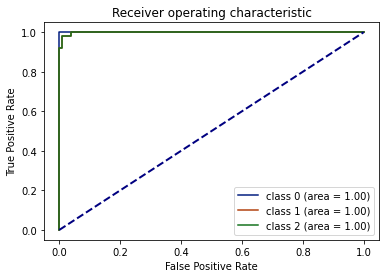

In [22]:
roc_curve_plot(grid_result,M,L)